In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_train = pd.read_csv("Trains.csv")
data_test = pd.read_csv("Tests.csv")

In [4]:
data_train.head(5)

,ID,Date,LicenseNo,Assessment_ID,Assessment_Name,Restaurent Type,Street ID,City ID,State ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,0,7/8/2017,35576,27170,25928,RESTAURANT,14291,id-11235901,id_1890134,81874.0,COMPLAINT,3.0,High,locid3070,1
1,1,28-06-2016,33490,9159,8683,BAKERY,15266,id-11235901,id_1890134,81876.0,CANVASS,18.0,High,locid16348,1
2,2,6/7/2014,1716,12151,11559,RESTAURANT,10113,id-11235901,id_1890134,81886.0,CANVASS,32.0,High,locid13425,4
3,3,3/6/2015,11101,12030,11446,RESTAURANT,274,id-11235901,id_1890134,81873.0,COMPLAINT,18.0,High,locid656,1
4,4,26-02-2017,28642,21406,20451,RESTAURANT,7338,id-11235901,id_1890134,81902.0,CANVASS,34.0,High,locid12104,4


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117491 entries, 0 to 117490
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     117491 non-null  int64  
 1   Date                   117491 non-null  object 
 2   LicenseNo              117491 non-null  int64  
 3   Assessment_ID          117491 non-null  int64  
 4   Assessment_Name        117491 non-null  int64  
 5   Restaurent Type        115862 non-null  object 
 6   Street ID              117491 non-null  int64  
 7   City ID                117491 non-null  object 
 8   State ID               117491 non-null  object 
 9   LocationID             117469 non-null  float64
 10  Reason                 117491 non-null  object 
 11  SectionViolations      90615 non-null   float64
 12  Risk_level             117491 non-null  object 
 13  Geographical_Location  117491 non-null  object 
 14  Assessment_Results     117491 non-nu

In [6]:
data_train = data_train.drop(['ID', 'Date'], axis=1)
data_train.head()

,LicenseNo,Assessment_ID,Assessment_Name,Restaurent Type,Street ID,City ID,State ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,35576,27170,25928,RESTAURANT,14291,id-11235901,id_1890134,81874.0,COMPLAINT,3.0,High,locid3070,1
1,33490,9159,8683,BAKERY,15266,id-11235901,id_1890134,81876.0,CANVASS,18.0,High,locid16348,1
2,1716,12151,11559,RESTAURANT,10113,id-11235901,id_1890134,81886.0,CANVASS,32.0,High,locid13425,4
3,11101,12030,11446,RESTAURANT,274,id-11235901,id_1890134,81873.0,COMPLAINT,18.0,High,locid656,1
4,28642,21406,20451,RESTAURANT,7338,id-11235901,id_1890134,81902.0,CANVASS,34.0,High,locid12104,4


In [7]:
data_train.rename(columns = {'LicenseNo' : 'License_No', 'Restaurent Type' : 'Restaurent_Type',
                            'Street ID' : 'Street_ID', data_train.columns[5] : 'City_ID', 'State ID' : 'State_ID',
                            'LocationID' : 'Location_ID', 'SectionViolations' : 'Section_Violations'}, inplace = True)
data_train.head()

,License_No,Assessment_ID,Assessment_Name,Restaurent_Type,Street_ID,City_ID,State_ID,Location_ID,Reason,Section_Violations,Risk_level,Geographical_Location,Assessment_Results
0,35576,27170,25928,RESTAURANT,14291,id-11235901,id_1890134,81874.0,COMPLAINT,3.0,High,locid3070,1
1,33490,9159,8683,BAKERY,15266,id-11235901,id_1890134,81876.0,CANVASS,18.0,High,locid16348,1
2,1716,12151,11559,RESTAURANT,10113,id-11235901,id_1890134,81886.0,CANVASS,32.0,High,locid13425,4
3,11101,12030,11446,RESTAURANT,274,id-11235901,id_1890134,81873.0,COMPLAINT,18.0,High,locid656,1
4,28642,21406,20451,RESTAURANT,7338,id-11235901,id_1890134,81902.0,CANVASS,34.0,High,locid12104,4


In [8]:
for i in range(data_train.City_ID.size):
    data_train.at[i, 'City_ID'] = data_train['City_ID'][i].replace('id-', '')
    data_train.at[i, 'Street_ID'] = int(data_train['Street_ID'][i])
    data_train.at[i, 'State_ID'] = data_train['State_ID'][i].replace('id_', '')
    data_train.at[i, 'Geographical_Location'] = int(data_train['Geographical_Location'][i].replace('locid', ''))

cols = ['City_ID', 'State_ID', 'Risk_level']
 
for col in cols:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(data_train[col].values.astype('str')))
    print(lbl.classes_)  # взглянем на категориальные классы
    data_train[col] = lbl.transform(list(data_train[col].values.astype('str')))

data_train.head(15)

['11235901' '11275913']
['1890134' '1890135']
['High' 'Low' 'Medium' 'Uncertain']


,License_No,Assessment_ID,Assessment_Name,Restaurent_Type,Street_ID,City_ID,State_ID,Location_ID,Reason,Section_Violations,Risk_level,Geographical_Location,Assessment_Results
0,35576,27170,25928,RESTAURANT,14291,0,0,81874.0,COMPLAINT,3.0,0,3070,1
1,33490,9159,8683,BAKERY,15266,0,0,81876.0,CANVASS,18.0,0,16348,1
2,1716,12151,11559,RESTAURANT,10113,0,0,81886.0,CANVASS,32.0,0,13425,4
3,11101,12030,11446,RESTAURANT,274,0,0,81873.0,COMPLAINT,18.0,0,656,1
4,28642,21406,20451,RESTAURANT,7338,0,0,81902.0,CANVASS,34.0,0,12104,4
5,28148,21824,20855,RESTAURANT,17307,0,0,81897.0,CANVASS,33.0,0,1162,4
6,9139,21108,20181,GROCERY STORE,2198,0,0,81888.0,CANVASS,41.0,2,597,4
7,33924,18109,17307,SCHOOL,5609,0,0,81857.0,CANVASS,3.0,1,6560,1
8,15874,2324,2157,RESTAURANT,16048,0,0,81871.0,LICENSE,NaN,0,16673,4
9,11819,25514,24352,MOBILE FOOD DISPENSER,6416,0,0,81853.0,LICENSE,NaN,1,5112,4


In [9]:
data_train.Restaurent_Type = data_train['Restaurent_Type'].map(data_train.groupby('Restaurent_Type').size())
data_train = data_train.loc[data_train['Restaurent_Type'] > 0.05 * data_train.Restaurent_Type.max()]
data_train

,License_No,Assessment_ID,Assessment_Name,Restaurent_Type,Street_ID,City_ID,State_ID,Location_ID,Reason,Section_Violations,Risk_level,Geographical_Location,Assessment_Results
0,35576,27170,25928,78151.0,14291,0,0,81874.0,COMPLAINT,3.0,0,3070,1
2,1716,12151,11559,78151.0,10113,0,0,81886.0,CANVASS,32.0,0,13425,4
3,11101,12030,11446,78151.0,274,0,0,81873.0,COMPLAINT,18.0,0,656,1
4,28642,21406,20451,78151.0,7338,0,0,81902.0,CANVASS,34.0,0,12104,4
5,28148,21824,20855,78151.0,17307,0,0,81897.0,CANVASS,33.0,0,1162,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117485,798,12264,11660,15142.0,11448,0,0,81861.0,COMPLAINT RE-INSPECTION,NaN,0,4727,4
117486,5901,1377,1229,78151.0,11709,0,0,81854.0,CANVASS,32.0,0,4241,4
117488,19374,22408,21426,7970.0,11481,0,0,81897.0,CANVASS,26.0,0,1341,1
117489,8531,3144,2943,78151.0,13643,0,0,81883.0,CANVASS,33.0,0,3619,4


In [10]:
len(data_train.Restaurent_Type.unique())

3

In [11]:
lbl = preprocessing.LabelEncoder()
lbl.fit(list(data_train['Restaurent_Type'].values.astype('float')))
print(lbl.classes_)  # взглянем на категориальные классы
data_train['Restaurent_Type'] = lbl.transform(list(data_train['Restaurent_Type'].values.astype('float')))

[ 7970. 15142. 78151.]


In [12]:
data_train.head()

,License_No,Assessment_ID,Assessment_Name,Restaurent_Type,Street_ID,City_ID,State_ID,Location_ID,Reason,Section_Violations,Risk_level,Geographical_Location,Assessment_Results
0,35576,27170,25928,2,14291,0,0,81874.0,COMPLAINT,3.0,0,3070,1
2,1716,12151,11559,2,10113,0,0,81886.0,CANVASS,32.0,0,13425,4
3,11101,12030,11446,2,274,0,0,81873.0,COMPLAINT,18.0,0,656,1
4,28642,21406,20451,2,7338,0,0,81902.0,CANVASS,34.0,0,12104,4
5,28148,21824,20855,2,17307,0,0,81897.0,CANVASS,33.0,0,1162,4


In [13]:
data_train.Reason = data_train['Reason'].map(data_train.groupby('Reason').size())
data_train = data_train.loc[data_train['Reason'] > 10000]

In [14]:
data_train.Reason.unique()

array([10176, 51244, 11770, 12529], dtype=int64)

In [15]:
lbl = preprocessing.LabelEncoder()
lbl.fit(list(data_train['Reason'].values.astype('int')))
print(lbl.classes_)  # взглянем на категориальные классы
data_train['Reason'] = lbl.transform(list(data_train['Reason'].values.astype('int')))

[10176 11770 12529 51244]


C:\Users\nikit\AppData\Local\Temp\ipykernel_17476\1439114356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Reason'] = lbl.transform(list(data_train['Reason'].values.astype('int')))


In [16]:
data_train

,License_No,Assessment_ID,Assessment_Name,Restaurent_Type,Street_ID,City_ID,State_ID,Location_ID,Reason,Section_Violations,Risk_level,Geographical_Location,Assessment_Results
0,35576,27170,25928,2,14291,0,0,81874.0,0,3.0,0,3070,1
2,1716,12151,11559,2,10113,0,0,81886.0,3,32.0,0,13425,4
3,11101,12030,11446,2,274,0,0,81873.0,0,18.0,0,656,1
4,28642,21406,20451,2,7338,0,0,81902.0,3,34.0,0,12104,4
5,28148,21824,20855,2,17307,0,0,81897.0,3,33.0,0,1162,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117483,10528,10703,10154,2,4240,0,0,81881.0,3,21.0,0,2876,5
117484,36857,24169,23053,2,4274,0,0,81863.0,2,33.0,0,12894,4
117486,5901,1377,1229,2,11709,0,0,81854.0,3,32.0,0,4241,4
117488,19374,22408,21426,0,11481,0,0,81897.0,3,26.0,0,1341,1


In [17]:
data_train.isnull().sum()

License_No                   0
Assessment_ID                0
Assessment_Name              0
Restaurent_Type              0
Street_ID                    0
City_ID                      0
State_ID                     0
Location_ID                 14
Reason                       0
Section_Violations       15045
Risk_level                   0
Geographical_Location        0
Assessment_Results           0
dtype: int64

In [18]:
data_train = data_train.dropna()

In [19]:
data_train.isnull().sum()

License_No               0
Assessment_ID            0
Assessment_Name          0
Restaurent_Type          0
Street_ID                0
City_ID                  0
State_ID                 0
Location_ID              0
Reason                   0
Section_Violations       0
Risk_level               0
Geographical_Location    0
Assessment_Results       0
dtype: int64

In [20]:
Dup_Rows = data_train[data_train.duplicated()]
Dup_Rows

,License_No,Assessment_ID,Assessment_Name,Restaurent_Type,Street_ID,City_ID,State_ID,Location_ID,Reason,Section_Violations,Risk_level,Geographical_Location,Assessment_Results
665,28050,11119,10553,2,13966,0,0,81883.0,3,51.0,0,3229,4
1039,34791,23193,22122,1,5270,0,0,81868.0,2,32.0,0,5291,4
1437,736,3746,3530,2,1173,0,0,81911.0,3,32.0,0,16551,4
1847,12126,23816,22720,2,4751,0,0,81892.0,3,3.0,0,10765,5
2432,10975,12097,11505,2,7735,0,0,81879.0,3,30.0,0,12154,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117457,12325,15801,15092,1,9917,0,0,81886.0,3,32.0,2,13351,4
117463,33586,19357,18495,0,481,0,0,81873.0,2,34.0,0,478,4
117469,31211,14499,13816,2,1477,0,0,81860.0,0,2.0,0,3689,1
117474,12270,9780,9277,2,4327,0,0,81904.0,0,3.0,0,16287,1


In [21]:
data_train.drop_duplicates(keep='first', inplace = True)

C:\Users\nikit\AppData\Local\Temp\ipykernel_17476\1390582020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.drop_duplicates(keep='first', inplace = True)


In [22]:
Dup_Rows = data_train[data_train.duplicated()]
Dup_Rows

,License_No,Assessment_ID,Assessment_Name,Restaurent_Type,Street_ID,City_ID,State_ID,Location_ID,Reason,Section_Violations,Risk_level,Geographical_Location,Assessment_Results


In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61917 entries, 0 to 117488
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   License_No             61917 non-null  int64  
 1   Assessment_ID          61917 non-null  int64  
 2   Assessment_Name        61917 non-null  int64  
 3   Restaurent_Type        61917 non-null  int64  
 4   Street_ID              61917 non-null  int64  
 5   City_ID                61917 non-null  int32  
 6   State_ID               61917 non-null  int32  
 7   Location_ID            61917 non-null  float64
 8   Reason                 61917 non-null  int64  
 9   Section_Violations     61917 non-null  float64
 10  Risk_level             61917 non-null  int32  
 11  Geographical_Location  61917 non-null  object 
 12  Assessment_Results     61917 non-null  int64  
dtypes: float64(2), int32(3), int64(7), object(1)
memory usage: 5.9+ MB


In [24]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(data_train.drop('Assessment_Results', axis = 1)),
            columns=data_train.drop('Assessment_Results', axis = 1).columns, index=data_train.drop('Assessment_Results', axis = 1).index)
df['Assessment_Results'] = data_train.Assessment_Results

data_train = df

In [25]:
data_train

,License_No,Assessment_ID,Assessment_Name,Restaurent_Type,Street_ID,City_ID,State_ID,Location_ID,Reason,Section_Violations,Risk_level,Geographical_Location,Assessment_Results
0,0.951433,0.996114,0.996235,1.0,0.798804,0.0,0.0,0.123894,0.000000,0.028986,0.0,0.182619,1
2,0.045892,0.445483,0.444133,1.0,0.565239,0.0,0.0,0.176991,1.000000,0.449275,0.0,0.798584,4
3,0.296882,0.441047,0.439791,1.0,0.015206,0.0,0.0,0.119469,0.000000,0.246377,0.0,0.039022,1
4,0.765993,0.784792,0.785791,1.0,0.410107,0.0,0.0,0.247788,1.000000,0.478261,0.0,0.720005,4
5,0.752781,0.800117,0.801314,1.0,0.967408,0.0,0.0,0.225664,1.000000,0.463768,0.0,0.069121,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117478,0.928889,0.119556,0.117306,1.0,0.404405,0.0,0.0,0.092920,1.000000,0.449275,0.0,0.522931,4
117483,0.281558,0.392396,0.390148,1.0,0.236919,0.0,0.0,0.154867,1.000000,0.289855,0.0,0.171078,5
117484,0.985692,0.886090,0.885768,1.0,0.238819,0.0,0.0,0.075221,0.666667,0.463768,0.0,0.766998,4
117486,0.157815,0.050484,0.047222,1.0,0.654461,0.0,0.0,0.035398,1.000000,0.449275,0.0,0.252275,4


In [26]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61917 entries, 0 to 117488
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   License_No             61917 non-null  float64
 1   Assessment_ID          61917 non-null  float64
 2   Assessment_Name        61917 non-null  float64
 3   Restaurent_Type        61917 non-null  float64
 4   Street_ID              61917 non-null  float64
 5   City_ID                61917 non-null  float64
 6   State_ID               61917 non-null  float64
 7   Location_ID            61917 non-null  float64
 8   Reason                 61917 non-null  float64
 9   Section_Violations     61917 non-null  float64
 10  Risk_level             61917 non-null  float64
 11  Geographical_Location  61917 non-null  float64
 12  Assessment_Results     61917 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 6.6 MB


(array([3.13426038e-01, 7.75231358e-05, 1.97683996e-03, 7.29744658e-01,
        1.54600514e-01, 1.74427056e-04]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

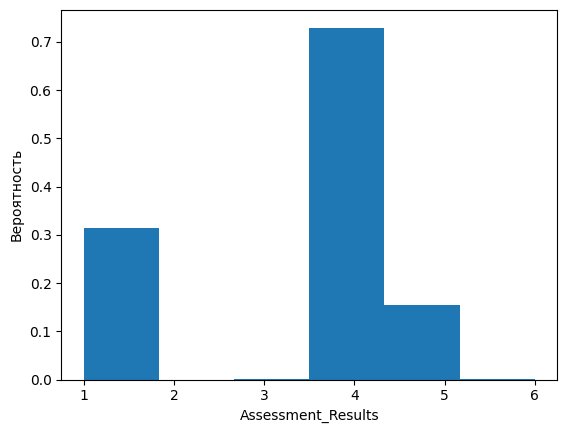

In [27]:
plt.xlabel('Assessment_Results')
plt.ylabel('Вероятность')
plt.hist(x=data_train['Assessment_Results'], bins=6, density=True)

In [28]:
unique, counts = np.unique(data_train.Assessment_Results, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[    1 16172]
 [    2     4]
 [    3   102]
 [    4 37653]
 [    5  7977]
 [    6     9]]


C:\Users\nikit\AppData\Local\Temp\ipykernel_17476\3318759186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Assessment_Results'] = lbl.transform(list(data_train['Assessment_Results'].values.astype('int')))


(array([0.39251157, 0.91387819, 0.19361024]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

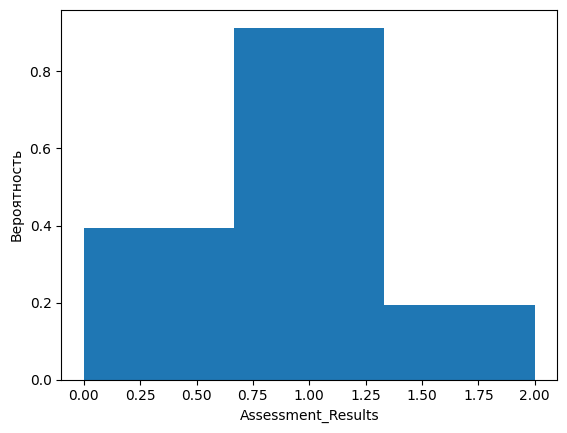

In [29]:
data_train = data_train.loc[~df['Assessment_Results'].isin([2,3,6])]

lbl = preprocessing.LabelEncoder()
lbl.fit(list(data_train['Assessment_Results'].values.astype('int')))
data_train['Assessment_Results'] = lbl.transform(list(data_train['Assessment_Results'].values.astype('int')))

plt.xlabel('Assessment_Results')
plt.ylabel('Вероятность')
plt.hist(x=data_train['Assessment_Results'], bins=3, density=True)

<AxesSubplot:>

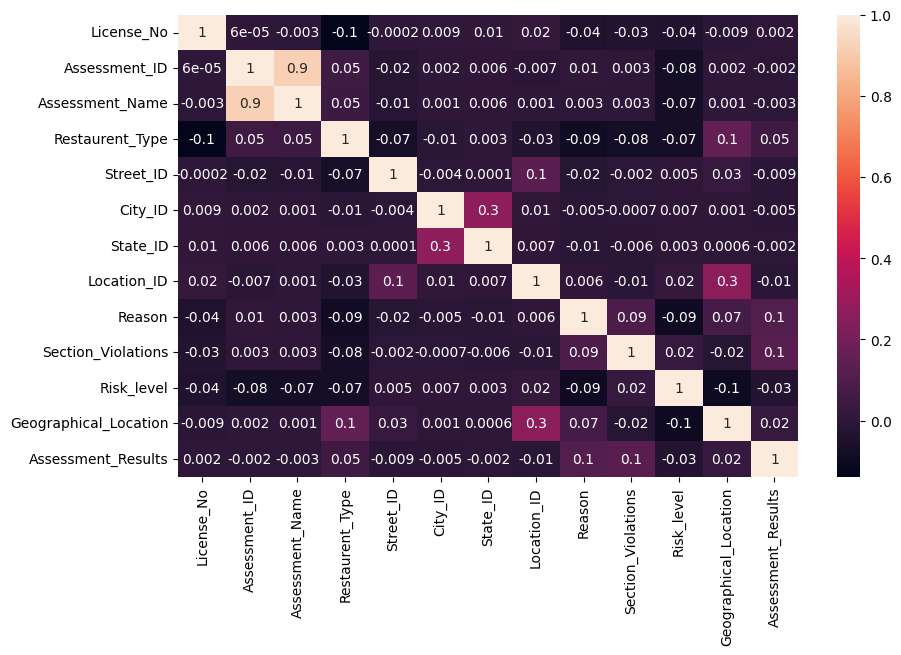

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_train.corr(), annot = True, fmt = '.1g')

In [31]:
data_train = data_train.drop(['Assessment_ID', 'Assessment_Name', 'Street_ID', 'City_ID', 'State_ID'], axis = 1)
data_train

,License_No,Restaurent_Type,Location_ID,Reason,Section_Violations,Risk_level,Geographical_Location,Assessment_Results
0,0.951433,1.0,0.123894,0.000000,0.028986,0.0,0.182619,0
2,0.045892,1.0,0.176991,1.000000,0.449275,0.0,0.798584,1
3,0.296882,1.0,0.119469,0.000000,0.246377,0.0,0.039022,0
4,0.765993,1.0,0.247788,1.000000,0.478261,0.0,0.720005,1
5,0.752781,1.0,0.225664,1.000000,0.463768,0.0,0.069121,1
...,...,...,...,...,...,...,...,...
117478,0.928889,1.0,0.092920,1.000000,0.449275,0.0,0.522931,1
117483,0.281558,1.0,0.154867,1.000000,0.289855,0.0,0.171078,2
117484,0.985692,1.0,0.075221,0.666667,0.463768,0.0,0.766998,1
117486,0.157815,1.0,0.035398,1.000000,0.449275,0.0,0.252275,1


<AxesSubplot:xlabel='Section_Violations', ylabel='Reason'>

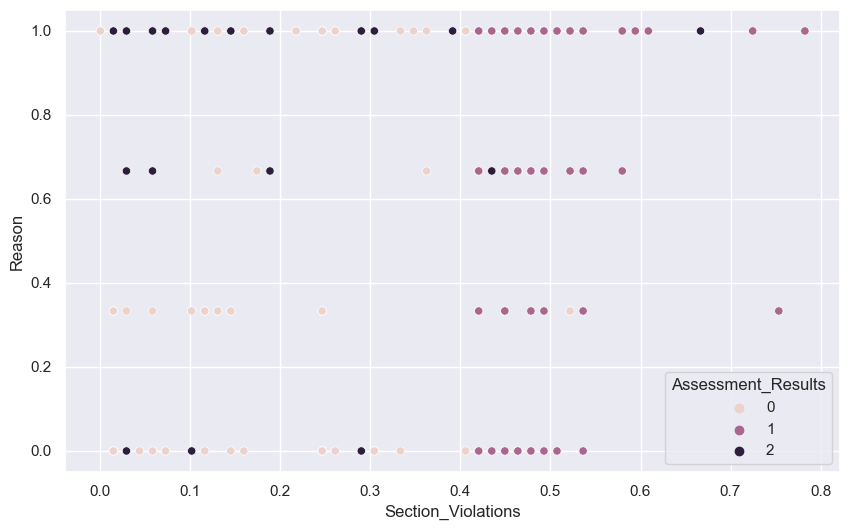

In [32]:
sns.set(rc={'figure.figsize':'10, 6'})

sns.scatterplot(x='Section_Violations', y = 'Reason', hue = 'Assessment_Results', data = data_train.sample(500))

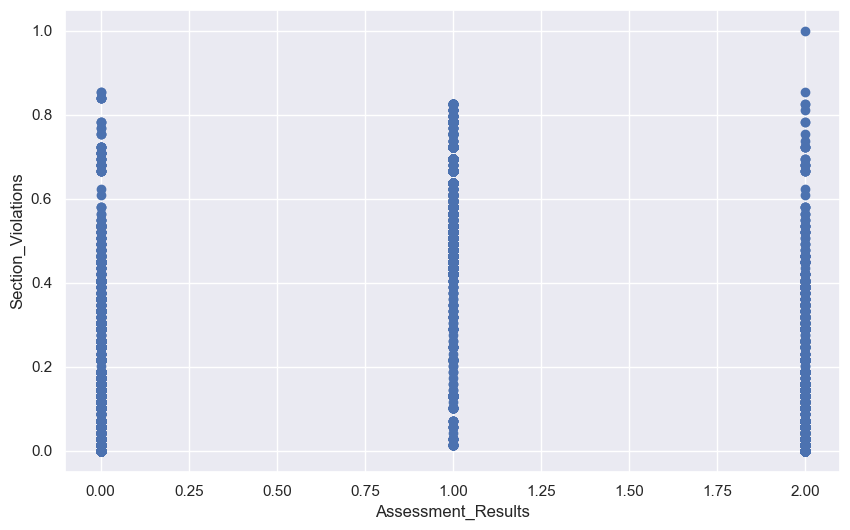

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data_train['Assessment_Results'], y = data_train['Section_Violations'])
plt.xlabel("Assessment_Results")
plt.ylabel("Section_Violations")

plt.show()

(array([3.4770e+03, 4.8500e+03, 7.1900e+02, 5.1700e+02, 4.2000e+01,
        1.1580e+03, 7.0500e+02, 1.6520e+03, 1.1800e+02, 4.6800e+02,
        1.4940e+03, 2.5000e+01, 4.2190e+03, 6.7600e+02, 1.3960e+03,
        3.3300e+02, 4.8000e+02, 1.0800e+02, 3.0900e+02, 1.3100e+02,
        1.0840e+03, 6.8690e+03, 1.0900e+04, 1.2454e+04, 2.5260e+03,
        6.6600e+02, 2.2450e+03, 5.9000e+01, 7.8700e+02, 7.8000e+01,
        8.3000e+01, 2.2600e+02, 0.0000e+00, 2.0700e+02, 1.7700e+02,
        1.0000e+01, 1.7800e+02, 4.4000e+01, 8.0000e+00, 2.6300e+02,
        1.4000e+01, 3.7000e+01, 9.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

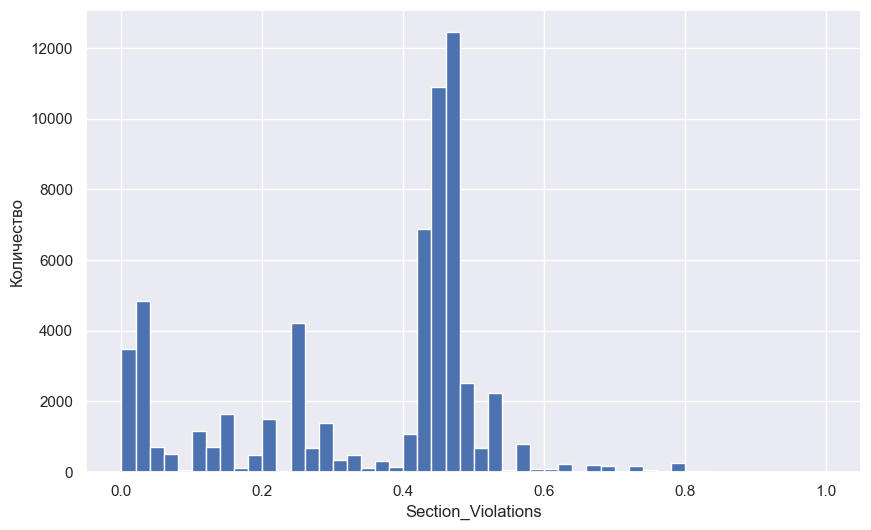

In [34]:
plt.xlabel('Section_Violations')
plt.ylabel('Количество')
plt.hist(x=data_train['Section_Violations'], bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea1a2c0100>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea1a2c06a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea1a28eda0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea1a2c0c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea1a2c0f10>],
 'means': []}

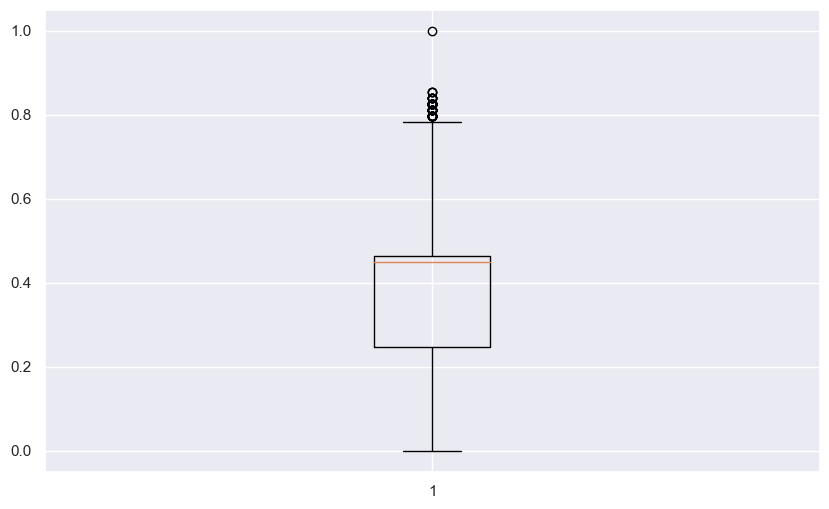

In [35]:
plt.boxplot(x=data_train['Section_Violations'])

Обучение

In [36]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [37]:
X = data_train.drop('Assessment_Results', axis = 1)
y = data_train.Assessment_Results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [38]:
X_train

,License_No,Restaurent_Type,Location_ID,Reason,Section_Violations,Risk_level,Geographical_Location
6378,0.267544,1.0,0.030973,0.666667,0.463768,0.0,0.367319
114030,0.721892,1.0,0.261062,1.000000,0.028986,0.0,0.938017
112,0.148962,1.0,0.017699,0.666667,0.420290,0.0,0.388615
99368,0.619571,1.0,0.022124,1.000000,0.420290,0.0,0.456368
70225,0.927979,1.0,0.265487,1.000000,0.420290,0.0,0.398668
...,...,...,...,...,...,...,...
42969,0.389656,0.5,0.221239,0.000000,0.463768,0.0,0.573850
27127,0.954830,1.0,0.008850,1.000000,0.463768,1.0,0.430551
104333,0.387035,1.0,0.190265,0.666667,0.289855,0.0,0.415085
4776,0.938329,0.5,0.106195,1.000000,0.449275,0.0,0.882755


In [39]:
y_train

6378      1
114030    2
112       1
99368     1
70225     1
         ..
42969     1
27127     1
104333    2
4776      1
34093     0
Name: Assessment_Results, Length: 49441, dtype: int64

Логистическая регрессия

In [40]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            "solver":["sag", "saga", "lbfgs"],  
            "penalty": ["l2", "none"],
            'max_iter': [1000]}

log_class = LogisticRegression()
grid_log = GridSearchCV(log_class, param_grid, cv = 3, n_jobs = -1, error_score=0.0)

grid_log.fit(X_train, y_train)

c:\Users\nikit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=3, error_score=0.0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [1000], 'penalty': ['l2', 'none'],
                         'solver': ['sag', 'saga', 'lbfgs']})

In [41]:
best_clf = grid_log.best_estimator_
best_clf.get_params()

{'C': 1000,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [42]:
y_pred = best_clf.predict(X_test)

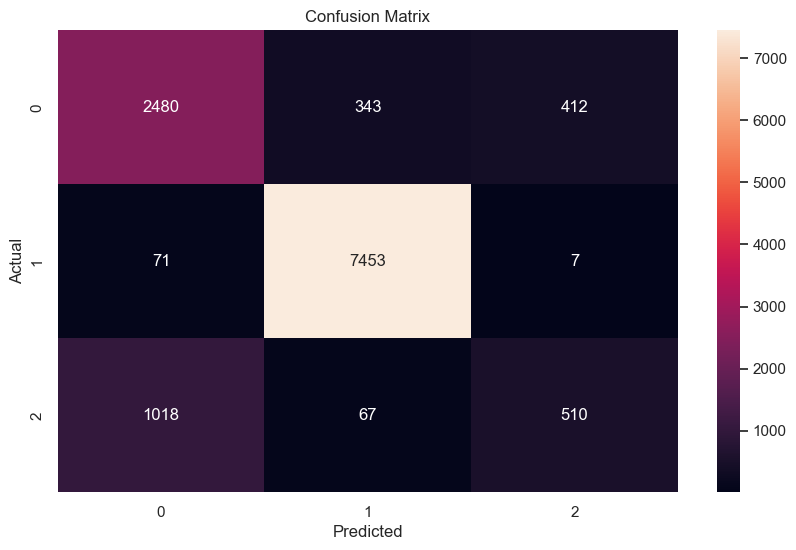

In [43]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1', '2'])
ax.yaxis.set_ticklabels(['0', '1', '2'])

plt.show()

In [44]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.77      0.73      3235
     class 1       0.95      0.99      0.97      7531
     class 2       0.55      0.32      0.40      1595

    accuracy                           0.84     12361
   macro avg       0.73      0.69      0.70     12361
weighted avg       0.83      0.84      0.83     12361



In [45]:
y_roc = label_binarize(y, classes = [0, 1, 2])
y_test_roc = label_binarize(y_test, classes = [0, 1, 2])
n_classes = y_roc.shape[1]

In [46]:
y_score = best_clf.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

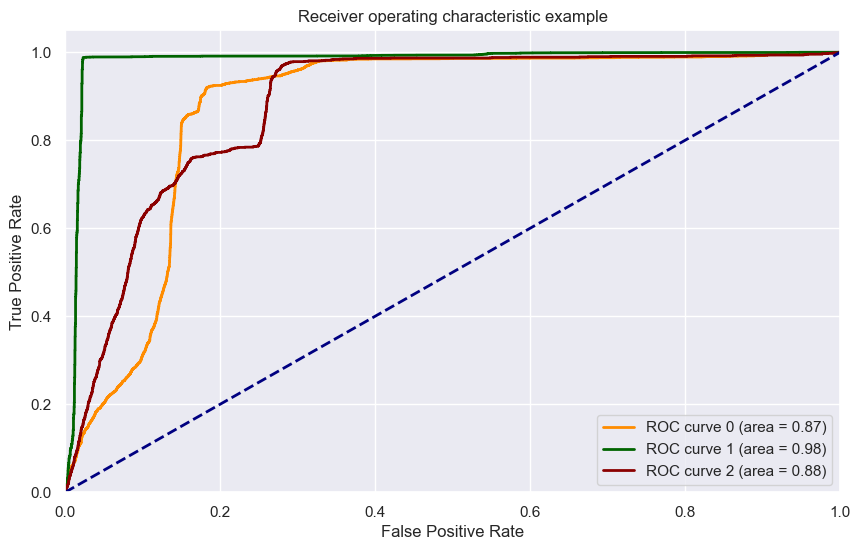

In [47]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='darkgreen',
         lw=lw, label='ROC curve 1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='darkred',
         lw=lw, label='ROC curve 2 (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

KNN

In [48]:
grid_params = {'n_neighbors' : [i for i in range(1, 11)],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan']}

In [49]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [50]:
best_clf = grid_knn.best_estimator_
best_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

In [51]:
y_pred = best_clf.predict(X_test)

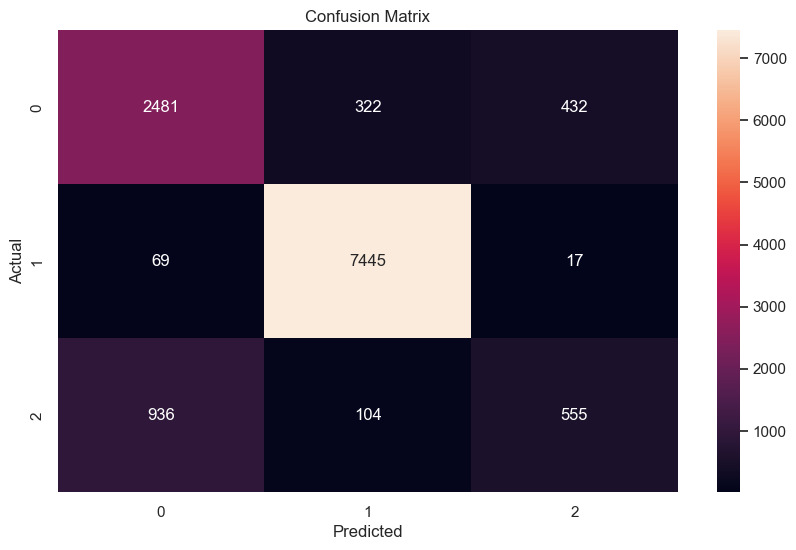

In [52]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1', '2'])
ax.yaxis.set_ticklabels(['0', '1', '2'])

plt.show()

In [53]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      0.77      0.74      3235
     class 1       0.95      0.99      0.97      7531
     class 2       0.55      0.35      0.43      1595

    accuracy                           0.85     12361
   macro avg       0.74      0.70      0.71     12361
weighted avg       0.83      0.85      0.84     12361



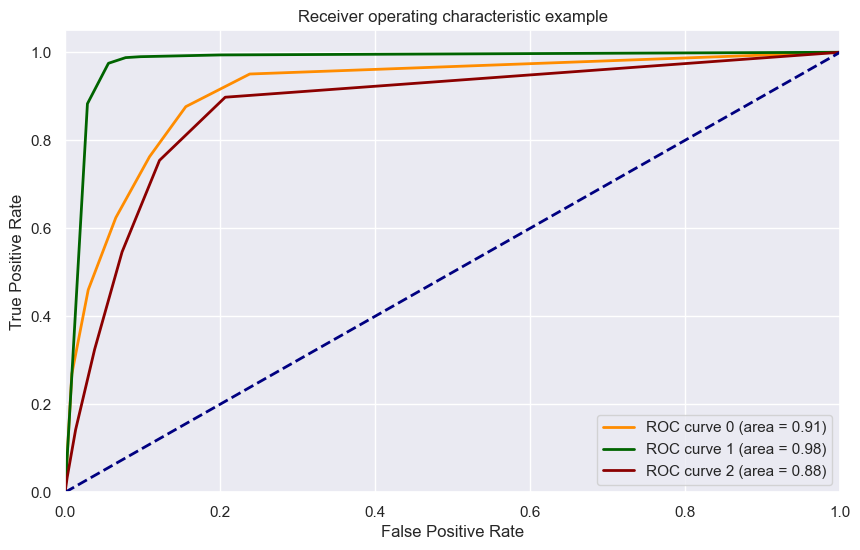

In [54]:
y_roc = label_binarize(y, classes = [0, 1, 2])
y_test_roc = label_binarize(y_test, classes = [0, 1, 2])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='darkgreen',
         lw=lw, label='ROC curve 1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='darkred',
         lw=lw, label='ROC curve 2 (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

SVM

In [55]:
from sklearn.svm import SVC
param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['rbf', 'sigmoid']}

In [56]:
svc_clas = SVC()
grid_svm = GridSearchCV(svc_clas, param_grid, refit = True, cv = 3, verbose = 3, n_jobs = -1)

grid_svm.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [57]:
best_clf = grid_svm.best_estimator_
best_clf.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [58]:
y_pred = best_clf.predict(X_test)

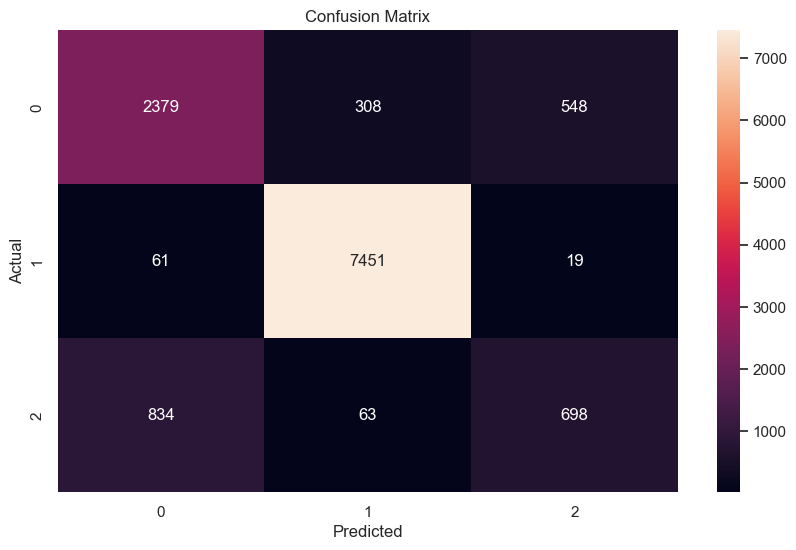

In [59]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1', '2'])
ax.yaxis.set_ticklabels(['0', '1', '2'])

plt.show()

In [60]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.73      0.74      0.73      3235
     class 1       0.95      0.99      0.97      7531
     class 2       0.55      0.44      0.49      1595

    accuracy                           0.85     12361
   macro avg       0.74      0.72      0.73     12361
weighted avg       0.84      0.85      0.85     12361



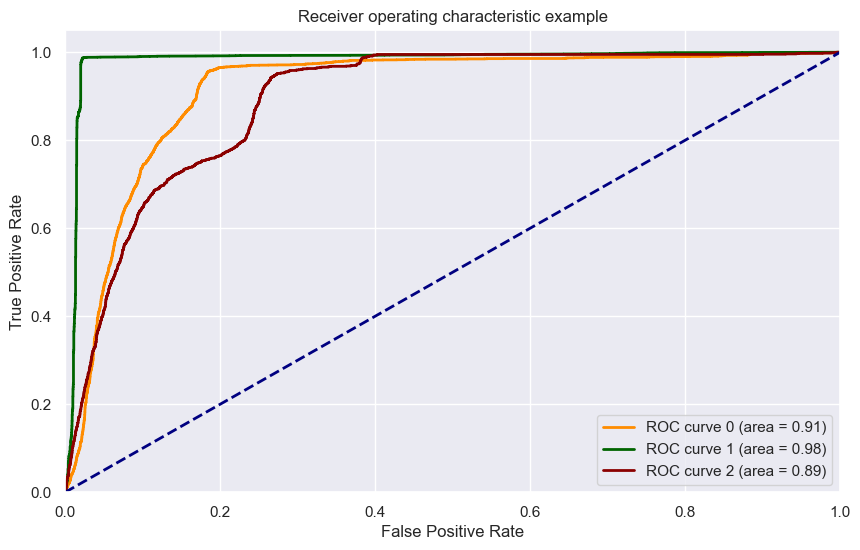

In [61]:
y_roc = label_binarize(y, classes = [0, 1, 2])
y_test_roc = label_binarize(y_test, classes = [0, 1, 2])
n_classes = y_roc.shape[1]

y_score = best_clf.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='darkgreen',
         lw=lw, label='ROC curve 1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='darkred',
         lw=lw, label='ROC curve 2 (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Naive Bayes

In [62]:
grid_param = {'var_smoothing': np.logspace(0,-9, num=100)}

In [63]:
naive_bayes = GaussianNB()
grid_naive = GridSearchCV(naive_bayes, grid_param, cv = 3, n_jobs = -1, verbose = 1)
grid_naive.fit(X_train , y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [64]:
best_clf = grid_naive.best_estimator_
best_clf.get_params()

{'priors': None, 'var_smoothing': 0.01}

In [65]:
y_pred = best_clf.predict(X_test)

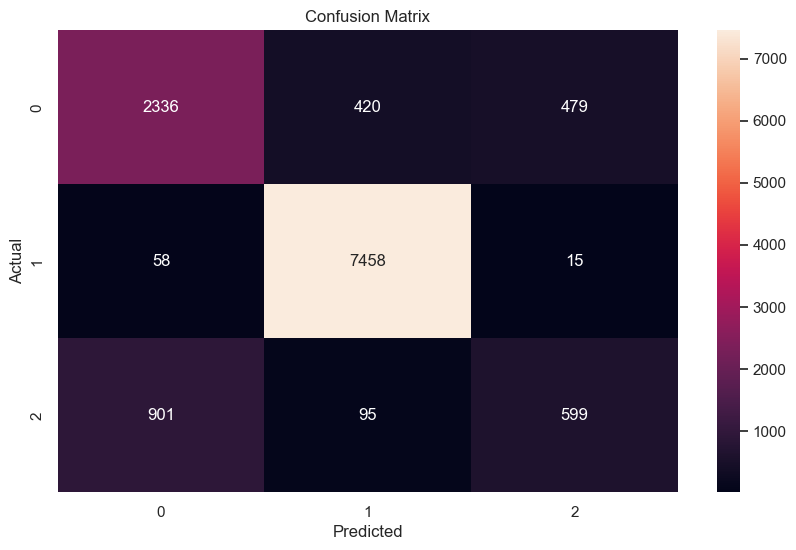

In [66]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1', '2'])
ax.yaxis.set_ticklabels(['0', '1', '2'])

plt.show()

In [67]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      0.72      0.72      3235
     class 1       0.94      0.99      0.96      7531
     class 2       0.55      0.38      0.45      1595

    accuracy                           0.84     12361
   macro avg       0.73      0.70      0.71     12361
weighted avg       0.83      0.84      0.83     12361



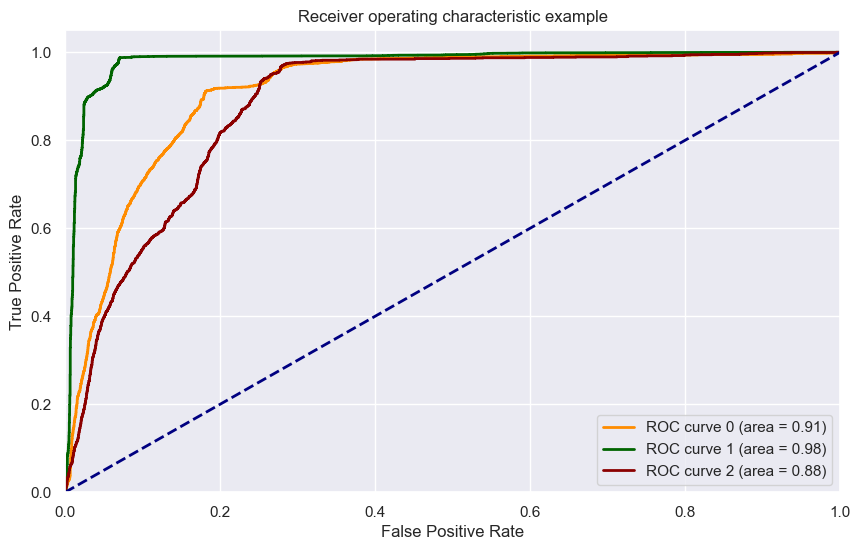

In [68]:
y_roc = label_binarize(y, classes = [0, 1, 2])
y_test_roc = label_binarize(y_test, classes = [0, 1, 2])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='darkgreen',
         lw=lw, label='ROC curve 1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='darkred',
         lw=lw, label='ROC curve 2 (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Дерево решений

In [69]:
grid_param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': range(2, 14, 4),
    'min_samples_leaf': range(1, 7, 2),
    'max_depth': [1, 5, 10, 20, 30, 40]
}

In [70]:
decision_tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(decision_tree, grid_param, cv = 3, n_jobs = -1, verbose = 1)
grid_tree.fit(X_train , y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, 20, 30, 40],
                         'min_samples_leaf': range(1, 7, 2),
                         'min_samples_split': range(2, 14, 4)},
             verbose=1)

In [71]:
best_clf = grid_tree.best_estimator_
best_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [72]:
y_pred = best_clf.predict(X_test)

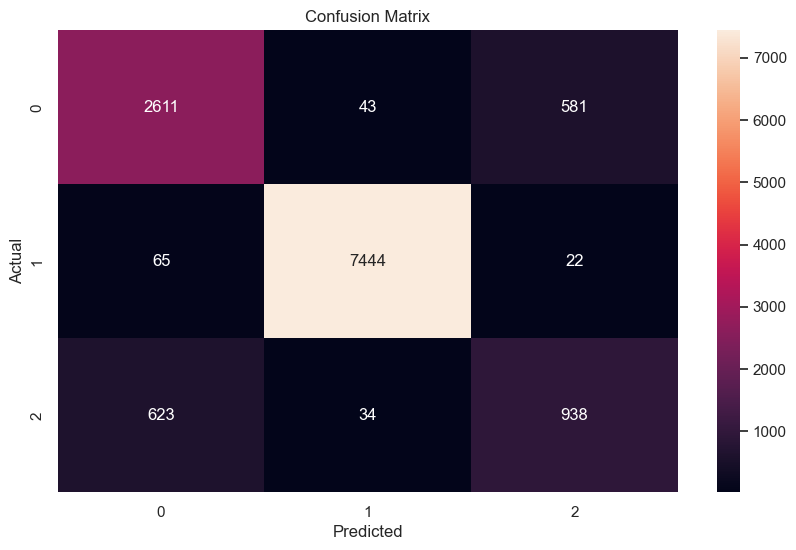

In [73]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1', '2'])
ax.yaxis.set_ticklabels(['0', '1', '2'])

plt.show()

In [74]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.79      0.81      0.80      3235
     class 1       0.99      0.99      0.99      7531
     class 2       0.61      0.59      0.60      1595

    accuracy                           0.89     12361
   macro avg       0.80      0.79      0.80     12361
weighted avg       0.89      0.89      0.89     12361



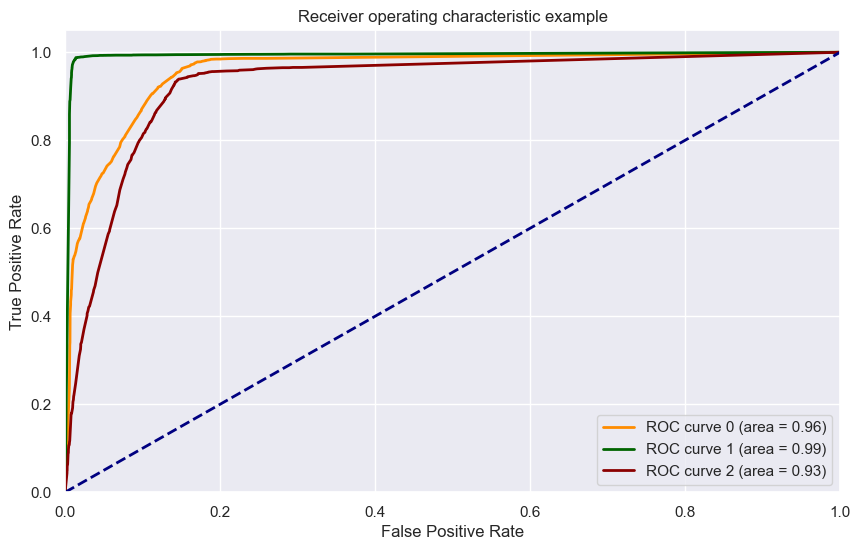

In [75]:
y_roc = label_binarize(y, classes = [0, 1, 2])
y_test_roc = label_binarize(y_test, classes = [0, 1, 2])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='darkgreen',
         lw=lw, label='ROC curve 1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='darkred',
         lw=lw, label='ROC curve 2 (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

[Text(0.5, 0.9, 'X[4] <= 0.413\nlog_loss = 1.323\nsamples = 49441\nvalue = [12937, 30122, 6382]\nclass = PASSED'),
 Text(0.25, 0.7, 'X[4] <= 0.109\nlog_loss = 1.018\nsamples = 19162\nvalue = [12573, 289, 6300]\nclass = FAILED'),
 Text(0.125, 0.5, 'X[3] <= 0.5\nlog_loss = 1.063\nsamples = 8222\nvalue = [4118, 71, 4033]\nclass = FAILED'),
 Text(0.0625, 0.3, 'X[4] <= 0.022\nlog_loss = 0.952\nsamples = 2985\nvalue = [1964, 9, 1012]\nclass = FAILED'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'X[3] <= 0.833\nlog_loss = 1.061\nsamples = 5237\nvalue = [2154, 62, 3021]\nclass = PASSED WITH SOME CONDITION'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'X[4] <= 0.268\nlog_loss = 0.87\nsamples = 10940\nvalue = [8455, 218, 2267]\nclass = FAILED'),
 Text(0.3125, 0.3, 'X[4] <= 0.239\nlog_loss = 0.702\nsamples = 7850\nvalue = [6665, 170, 1015]\nclass = FAILED'),
 Text(0.28125, 0.1, '\n  (...)  \n'),

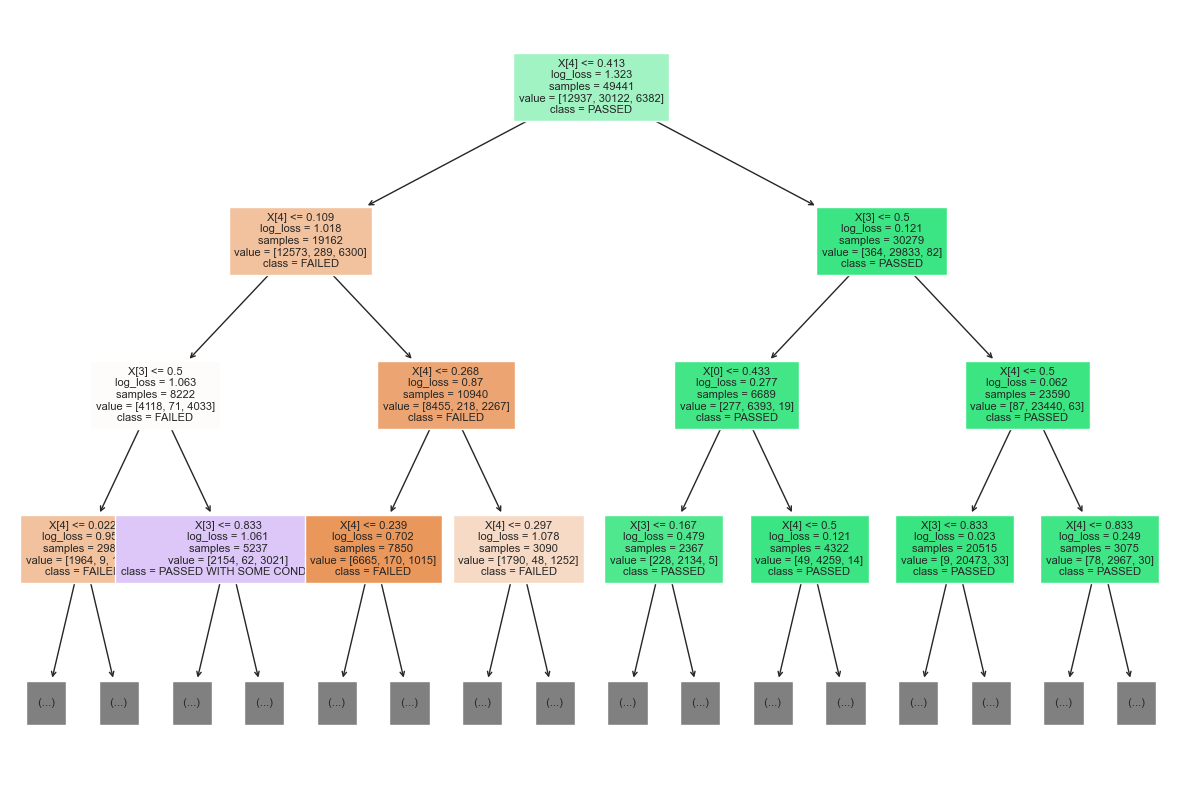

In [76]:
plt.figure(figsize=(15, 10))
cn = ['FAILED', 'PASSED', 'PASSED WITH SOME CONDITION']
plot_tree(best_clf, max_depth = 3, fontsize=8, filled = True, class_names = cn)

Случайный лес

In [77]:
grid_param = {
    'n_estimators': [50, 100, 200, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 16, 4)
}

In [78]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, grid_param, cv = 3, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 16, 4),
                         'n_estimators': [50, 100, 200, 400]})

In [79]:
best_clf = grid_rfc.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [80]:
y_pred = best_clf.predict(X_test)

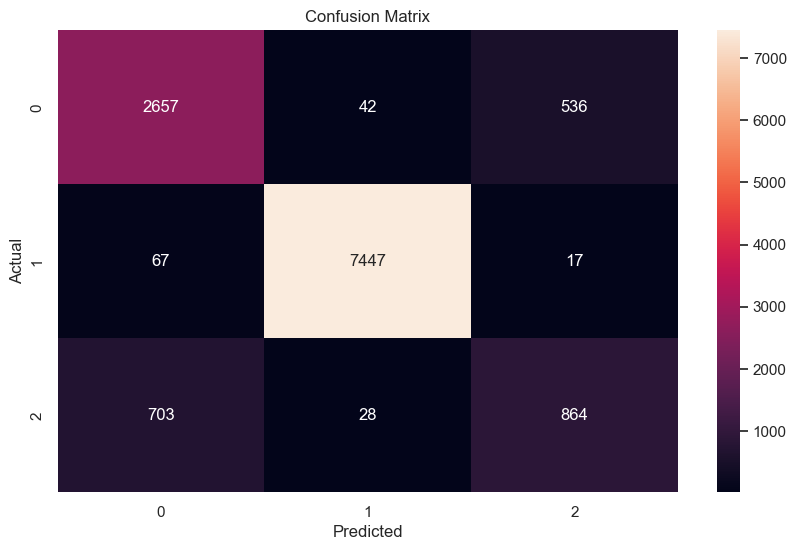

In [81]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1', '2'])
ax.yaxis.set_ticklabels(['0', '1', '2'])

plt.show()

In [82]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.82      0.80      3235
     class 1       0.99      0.99      0.99      7531
     class 2       0.61      0.54      0.57      1595

    accuracy                           0.89     12361
   macro avg       0.79      0.78      0.79     12361
weighted avg       0.89      0.89      0.89     12361



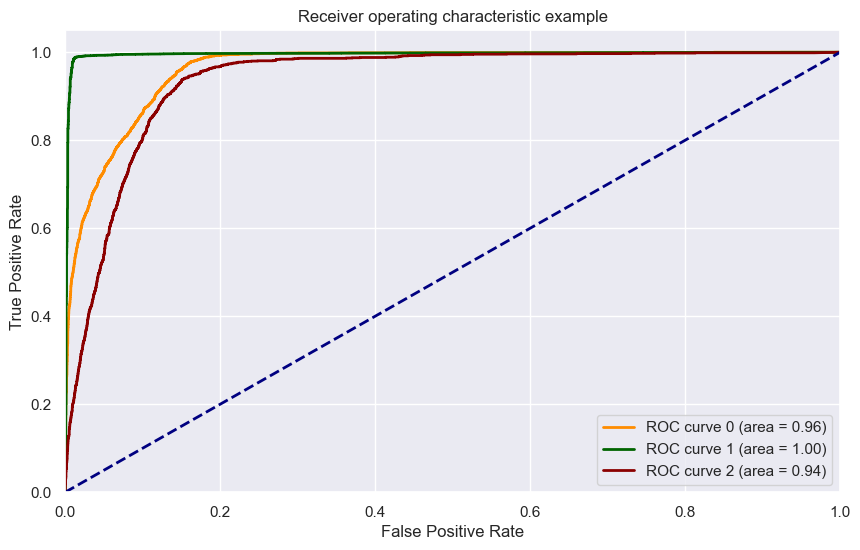

In [83]:
y_roc = label_binarize(y, classes = [0, 1])
y_test_roc = label_binarize(y_test, classes = [0, 1])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='darkgreen',
         lw=lw, label='ROC curve 1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='darkred',
         lw=lw, label='ROC curve 2 (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

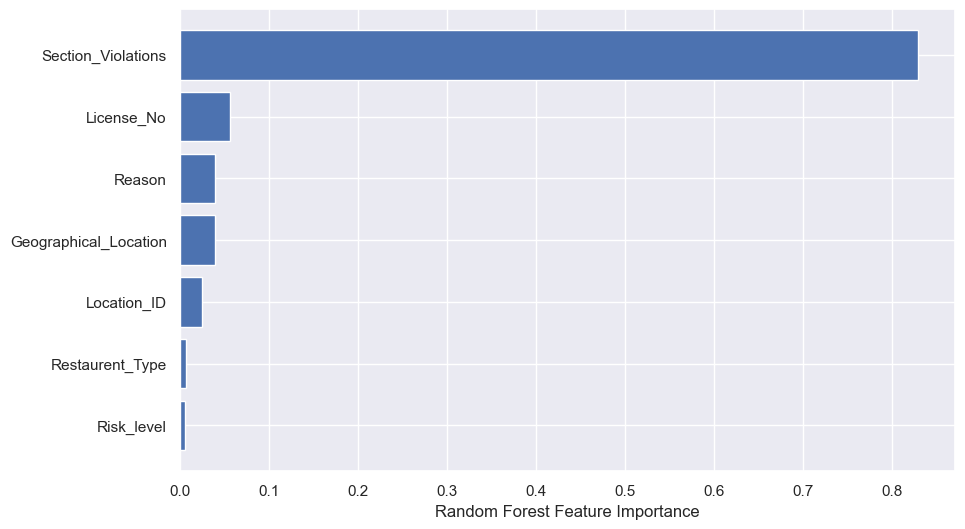

In [84]:
sorted_idx = best_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Permutation Importance')

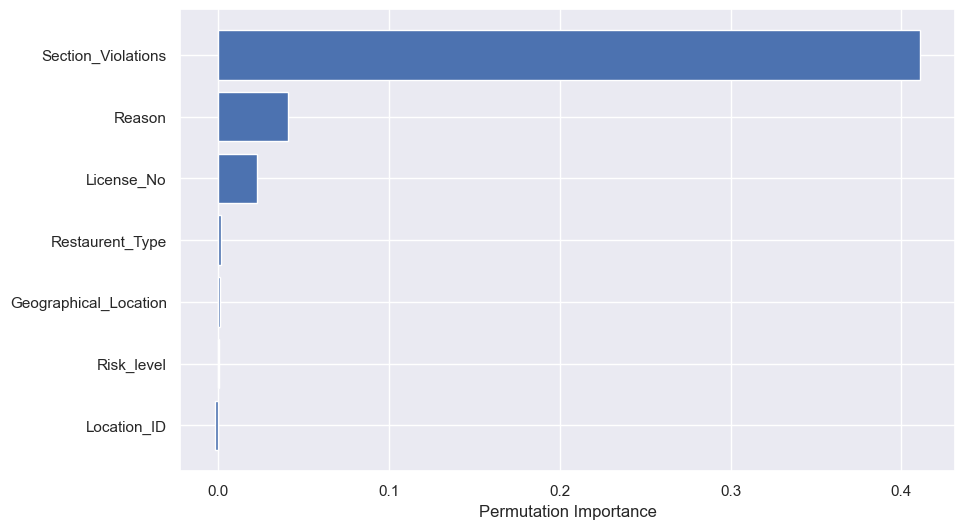

In [85]:
perm_importance = permutation_importance(best_clf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

XGBoost

In [86]:
from xgboost import XGBClassifier

In [87]:
grid_param = {'learning_rate': [0.02], 
        'min_child_weight': [1, 5],
        'max_depth': [10, 50, 100],
        'n_estimators': [50, 100, 500]
        }

In [88]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, grid_param, cv = 5, n_jobs = -1)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.02], 'max_depth': [10, 50, 100],
                         'min_child_weight': [1, 5],
                         'n_estimators': [50, 100, 500]})

In [89]:
best_clf = grid_xgb.best_estimator_
best_clf.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.02,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 10,
 'max_leaves': 0,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [90]:
y_pred = best_clf.predict(X_test)

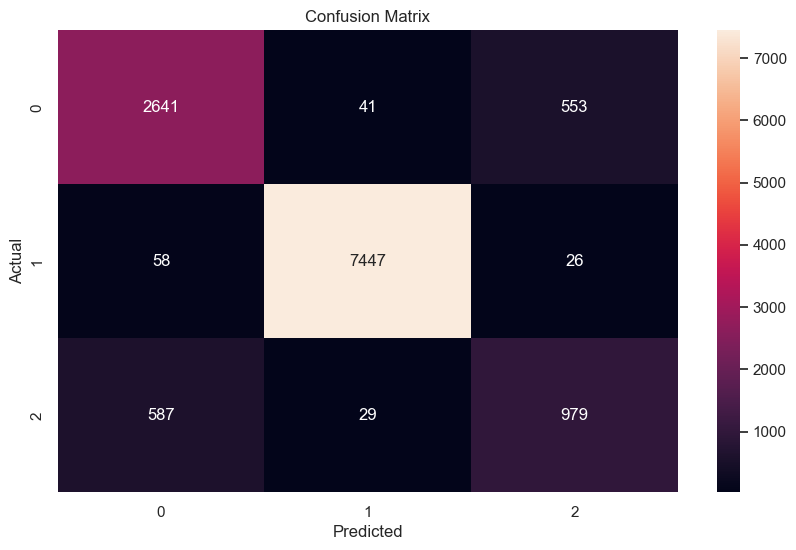

In [91]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1', '2'])
ax.yaxis.set_ticklabels(['0', '1', '2'])

plt.show()

In [92]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.82      0.81      3235
     class 1       0.99      0.99      0.99      7531
     class 2       0.63      0.61      0.62      1595

    accuracy                           0.90     12361
   macro avg       0.81      0.81      0.81     12361
weighted avg       0.90      0.90      0.90     12361



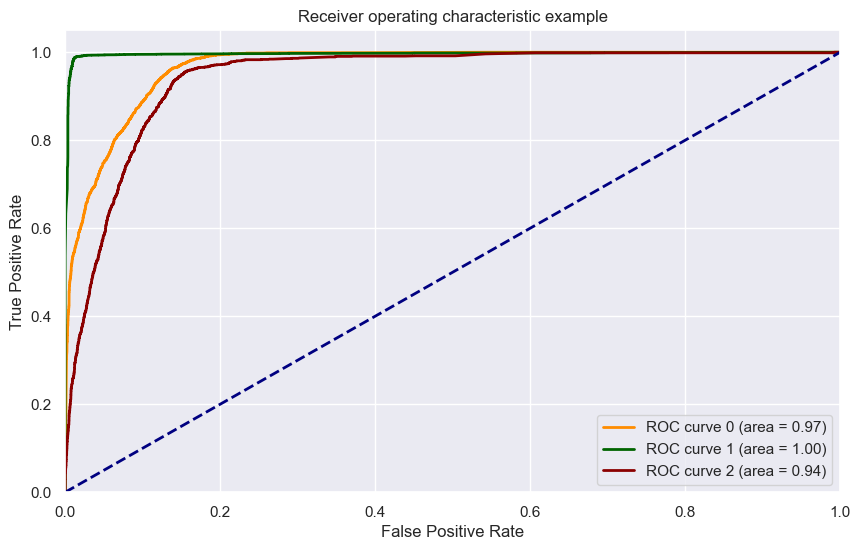

In [93]:
y_roc = label_binarize(y, classes = [0, 1, 2])
y_test_roc = label_binarize(y_test, classes = [0, 1, 2])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='darkgreen',
         lw=lw, label='ROC curve 1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='darkred',
         lw=lw, label='ROC curve 2 (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Permutation Importance')

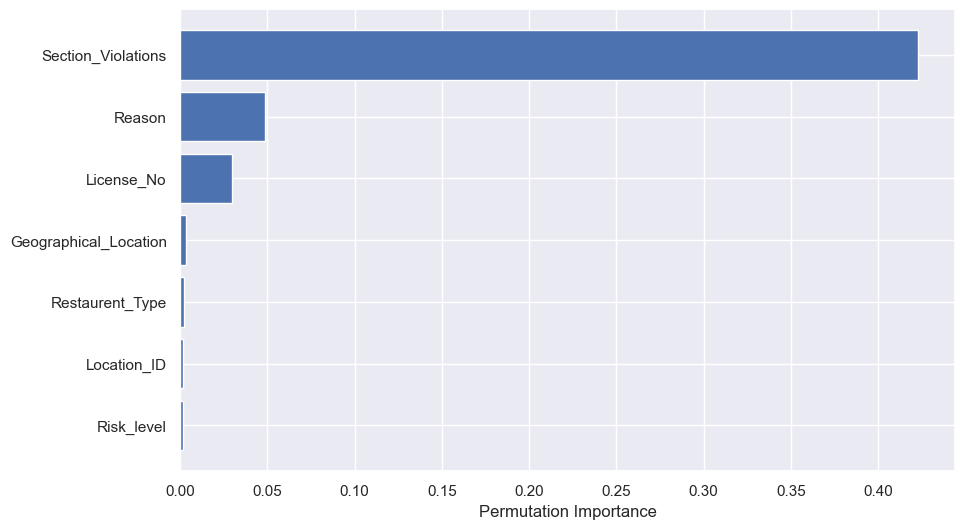

In [94]:
perm_importance = permutation_importance(best_clf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")